<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

Figure is the full canvas you can use to draw stuff on. Axis are individual mathematical axes used for plotting

# 2 Comparing the two ‘dialects’

In [2]:
from matplotlib import pyplot as plt
import numpy as np

### pyplot Interface

### OO Interface

In [10]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

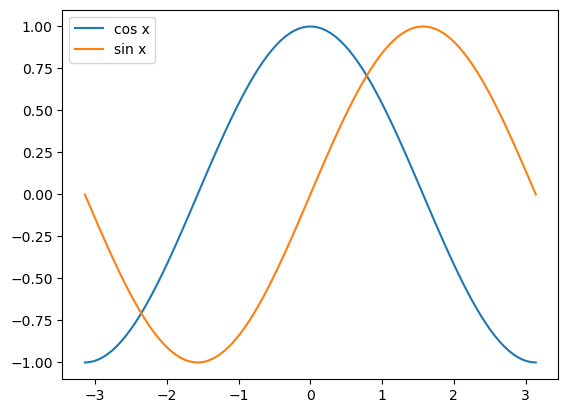

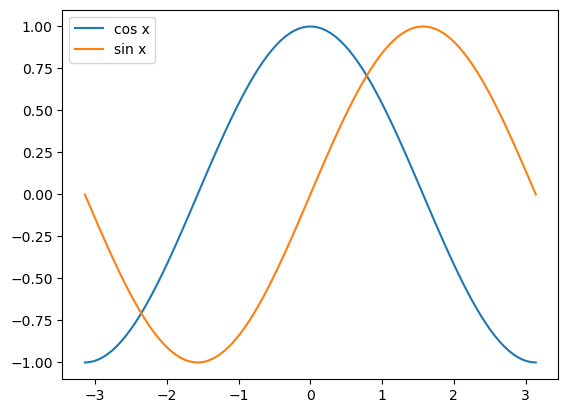

In [11]:
#version 1
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

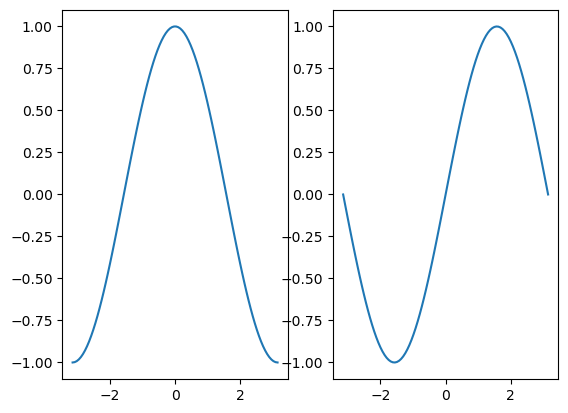

In [13]:
#version 2, easily manipulate by indexing and changing subplots
fig, ax = plt.subplots(nrows=1, ncols=2) #subplots() asking it to create a figure and an axis
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

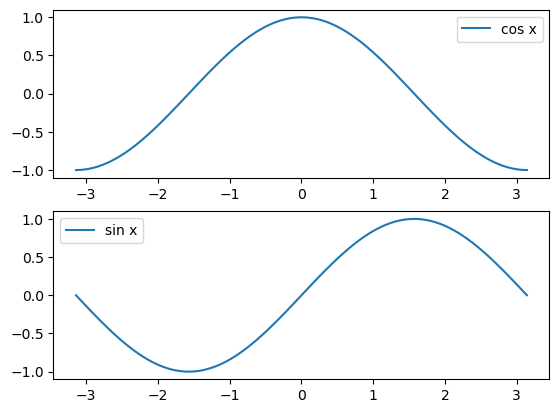

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1) #specifying no. of rows and cols. you want your plots/axes to be in.

ax[0].plot(x, cos_x, label='cos x') #ax is numpy array and contains 2 things: Matplotlib axis
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

TypeError: 'method' object is not subscriptable

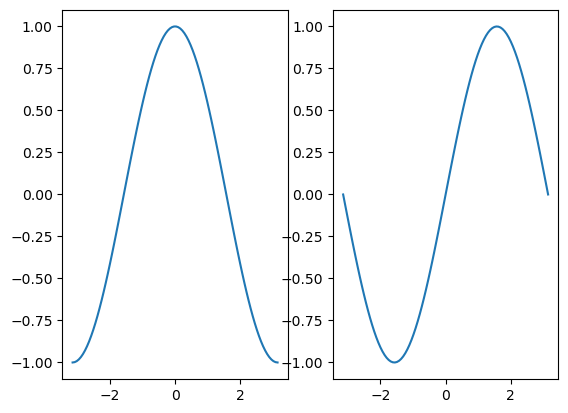

In [16]:
#version 2, easily manipulate by indexing and changing subplots
fig, ax = plt.subplots(nrows=1, ncols=2) #subplots() asking it to create a figure and an axis
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')
# ax.legend()

ax[0].plot[0]

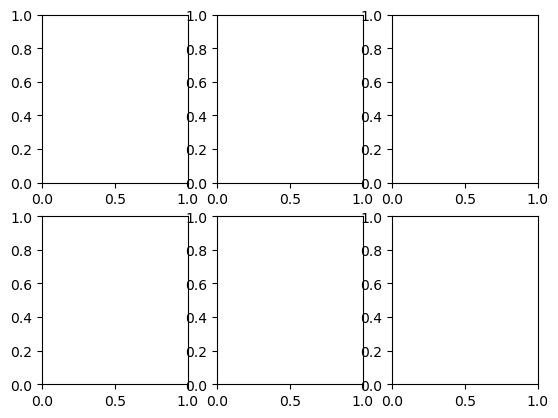

In [24]:
fig, ax = plt.subplots(nrows = 2, ncols = 3);

In [25]:
ax

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

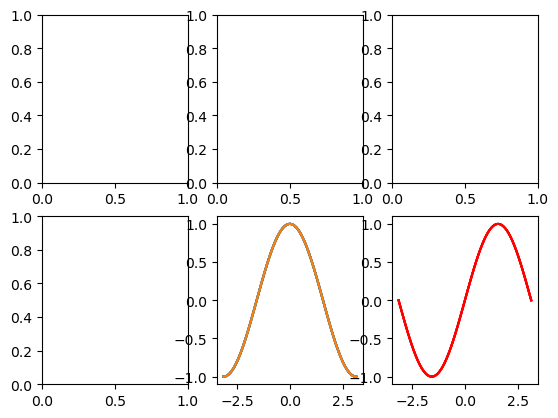

<Figure size 640x480 with 0 Axes>

In [38]:
ax[1, 1].plot(x, cos_x) #picking second row, second column
ax[1, 2].plot(x, sin_x, 'r') #picking second row, second column
plt.tight_layout()
fig

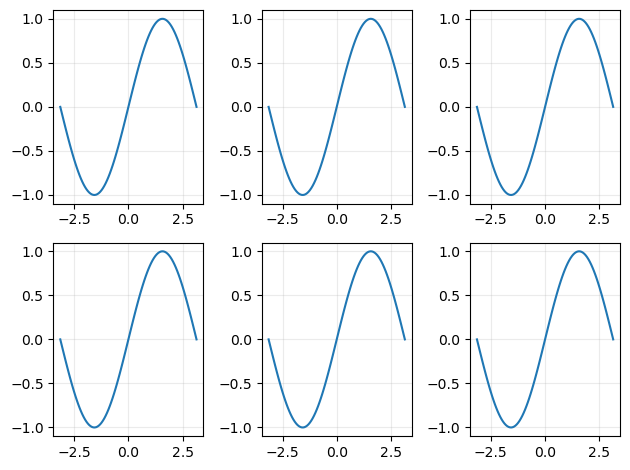

In [50]:
fig, ax = plt.subplots(nrows = 2, ncols = 3)

for a in ax.flatten(): #use flatten to make 2D into 1D list
    a.plot(x, sin_x)
    a.grid(alpha=.25)

plt.tight_layout() #adjusts itself so there's no overlapping between your axes

# 4 A complete OO example

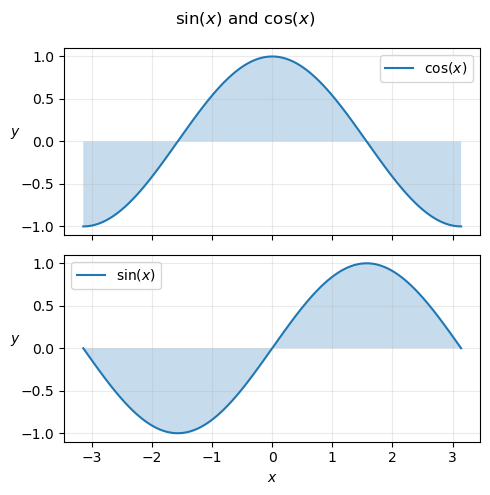

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5), #figure size for both
                       sharex=True) #sharing of x axis
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax: #drawing of legends, runs through 0 and 1 indexes of ax
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$') #bottom ax's x axis label. Just need to label the lowest point when sharing x axis

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') #super title
fig.tight_layout() #sleek

# 5 Multiple rows and columns

### Using ax

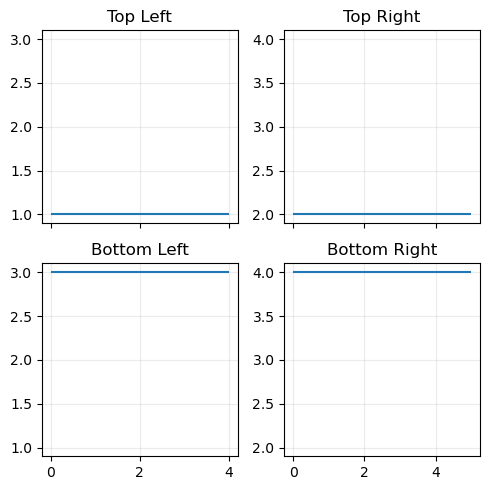

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# ax.shape, tells you the structure, 2x2.

# top_left=ax[0, 0]
# top_right=ax[0, 1]
# bottom_left=ax[1, 0]
# bottom_right=ax[1, 1]

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

#hlines to draw horizontal lines
top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.1 Sharing axes

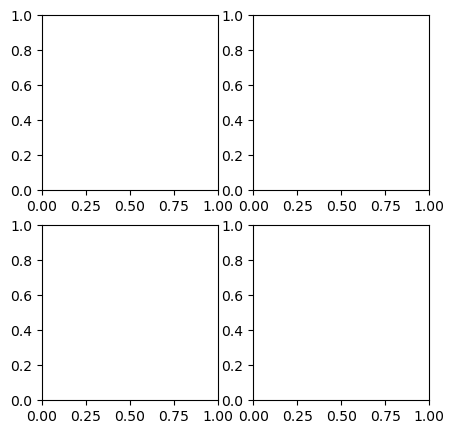

In [39]:
#if you don't specify how to share x and y axis
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

Specifying the sharing of axes
| Option | Result                                 |
|:------:|----------------------------------------|
|  True  | Makes all the axes use the same range. |
|   col  | Use the same range for all the columns |
|   row  | Use the same range for all the rows    |

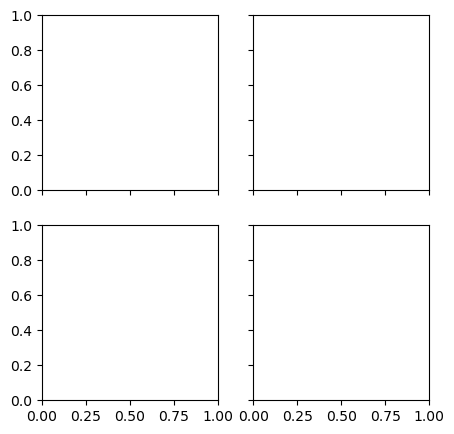

In [42]:
#sharing of x axis among all axes
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

## 5.2 Accessing all axes

In [ ]:
#you can do it one by one
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

#or you can use a for loop if have many
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

In [46]:
#need to access the files a few times, so create function
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) #skip first row as its the title

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1) #skip first row as its the title

    return data

### The histogram

In [47]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

FileNotFoundError: sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv not found.

## 6.2 Scatter plots

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers)) #using range along the length to generate a list [0, 1, 2...]
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

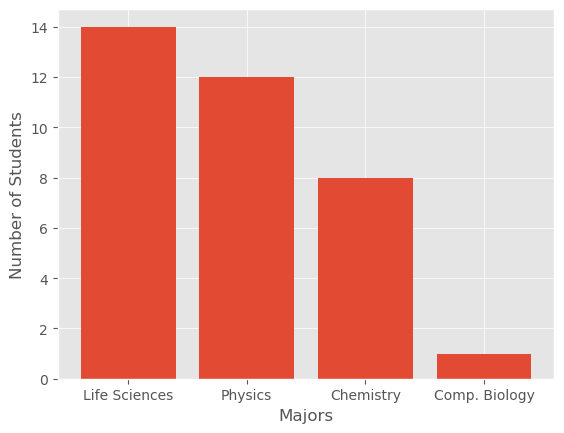

In [50]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys()) #asking it to make a list with the keys
numbers = list(student_numbers.values()) #asking it to make a list with the values

plt.style.use('ggplot')
plt.bar(majors, numbers) #bar gives you vertical barplots. use barh if want horizontal.
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

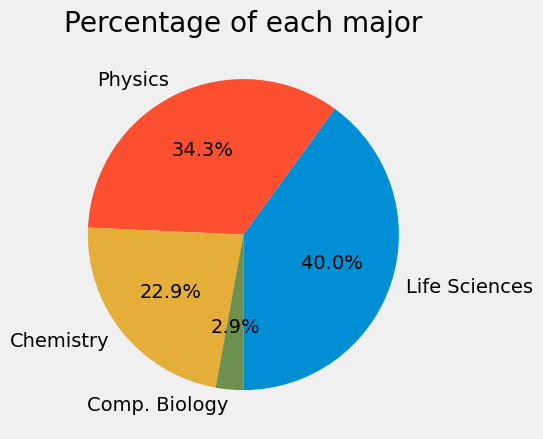

In [51]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')